## Project 4 Write-up: Enhancing Billionaires' Net Worth Prediction Model

In [1]:
from src.data_summary import DataSummary
from src.eda import DataCleaner
from src.eda import ExploratoryDataAnalysis
from src.model import Model

## Introduction
Building upon the foundation laid in Project 3, Project 4 introduces a sophisticated approach to analyzing the Forbes 2640 Billionaire dataset. Our goal is to develop a predictive model, delving deeper into understanding the factors influencing a billionaire's net worth. This project aims to add a new dimension to our analysis by incorporating machine learning techniques to answer more complex questions.

## Research Questions

</br>The primary research question addressed by the model is: "How do factors such as age, country, and industry influence the net worth of individuals in the Forbes Billionaire dataset?"</br> This question extends our exploratory data analysis (EDA) findings and seeks to quantify the relationships we observed.

## Data Summary and Preprocessing
The Forbes Billionaire dataset offers a comprehensive view of various attributes, including age, country of origin, industry, and net worth. Our approach includes cleaning and preprocessing the data to prepare it for analysis. Key steps in this process include:

Handling Missing Values: We employed strategies like mean imputation or dropping rows/columns with excessive missing data.
Feature Engineering: New features were developed, and existing ones transformed to better capture the nuances in the data. This includes one-hot encoding categorical variables like country and industry.
Data Scaling: Numerical features were standardized to ensure uniformity and improve model performance.

### Step 1.1: Load the Data


In [2]:


file_path = 'dataset.csv'
data_summary = DataSummary([file_path])
data = data_summary.load_data()
print("Data loaded successfully.")



Data loaded successfully.


### Step 1.2: Inspect the Data

In [3]:

# This step prints basic information about the DataFrame's structure
data_info = data_summary.inspect_data(data)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int64  
 1   name                2640 non-null   object 
 2   forbes_id           2640 non-null   object 
 3   net_worth           2640 non-null   float64
 4   age                 2575 non-null   float64
 5   age_range           2640 non-null   int64  
 6   country             2640 non-null   object 
 7   source              2640 non-null   object 
 8   industry            2640 non-null   object 
 9   Age                 2555 non-null   float64
 10  Source of Wealth    2639 non-null   object 
 11  Self-Made Score     558 non-null    float64
 12  Philanthropy Score  411 non-null    float64
 13  Residence           2581 non-null   object 
 14  Citizenship         2629 non-null   object 
 15  Marital Status      2089 non-null   object 
 16  Childr

### Step 1.3: Summarize the Data

In [4]:

# This step provides summary statistics of the DataFrame's numerical columns
data_summary_stats = data_summary.summarize_data(data)
print("Summary Statistics:\n", data_summary_stats)

Summary Statistics:
               rank    net_worth          age    age_range          Age  \
count  2640.000000  2640.000000  2575.000000  2640.000000  2555.000000   
mean   1289.159091     4.623788    65.138641     6.782955    65.457143   
std     739.693726     9.834241    13.258934     1.722357    13.245204   
min       1.000000     1.000000    18.000000     0.000000    19.000000   
25%     659.000000     1.500000    56.000000     6.000000    56.000000   
50%    1312.000000     2.300000    65.000000     7.000000    66.000000   
75%    1905.000000     4.200000    75.000000     8.000000    75.000000   
max    2540.000000   211.000000   101.000000    11.000000   101.000000   

       Self-Made Score  Philanthropy Score     Children     Bachelor  \
count       558.000000          411.000000  1598.000000  1416.000000   
mean          6.586022            1.927007     2.969337     0.686441   
std           2.644520            1.021489     1.675171     0.464103   
min           1.000000  

### Step 1.4: Check Missing Values

In [5]:

# This step counts missing values in each column of the DataFrame
missing_values = data_summary.check_missing_values(data)
print("Missing Values:\n", missing_values)


Missing Values:
 rank                     0
name                     0
forbes_id                0
net_worth                0
age                     65
age_range                0
country                  0
source                   0
industry                 0
Age                     85
Source of Wealth         1
Self-Made Score       2082
Philanthropy Score    2229
Residence               59
Citizenship             11
Marital Status         551
Children              1042
Education             1225
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64


In [6]:
# Step 5: Detect Outliers
# This step identifies outliers in the DataFrame using the IQR method
outliers = data_summary.detect_outliers(data)
print("Outliers:\n", outliers)


Outliers:
 Age                     7
Bachelor                0
Children               25
Citizenship             0
Doctorate              52
Drop Out               85
Education               0
Marital Status          0
Master                  0
Philanthropy Score     34
Residence               0
Self Made               0
Self-Made Score         0
Source of Wealth        0
age                     9
age_range              68
country                 0
forbes_id               0
industry                0
name                    0
net_worth             248
rank                    0
source                  0
dtype: int64


In [7]:
# Assuming 'data_summary' is an instance of the DataSummary class and 'data' is your DataFrame
validation_results = data_summary.validate_data_types_ranges(data)
print(validation_results)


{'rank': {'Correct Type': True, 'Within Range': True}, 'net_worth': {'Correct Type': True, 'Within Range': True}, 'age': {'Correct Type': True, 'Within Range': False}, 'age_range': {'Correct Type': True, 'Within Range': True}, 'Age': {'Correct Type': True, 'Within Range': False}, 'Self-Made Score': {'Correct Type': True, 'Within Range': False}, 'Philanthropy Score': {'Correct Type': True, 'Within Range': False}, 'Children': {'Correct Type': True, 'Within Range': False}, 'Bachelor': {'Correct Type': True, 'Within Range': False}, 'Master': {'Correct Type': True, 'Within Range': False}, 'Doctorate': {'Correct Type': True, 'Within Range': False}, 'Drop Out': {'Correct Type': True, 'Within Range': False}, 'Self Made': {'Correct Type': True, 'Within Range': True}}


# EDA

### 2A.1Using DataCleaner class to clean our data before EDA

In [8]:

# Initialize the DataCleaner class
data_cleaner = DataCleaner(data)

# Analyze null values
null_values = data_cleaner.analyze_null_values()
print("Null Values in Each Column:\n", null_values)



Null Values in Each Column:
 rank                     0
name                     0
forbes_id                0
net_worth                0
age                     65
age_range                0
country                  0
source                   0
industry                 0
Age                     85
Source of Wealth         1
Self-Made Score       2082
Philanthropy Score    2229
Residence               59
Citizenship             11
Marital Status         551
Children              1042
Education             1225
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64


In [9]:
# Clean column names
data_cleaner.clean_column_names()



In [10]:
columns_to_drop = ['rank','age_range','forbes_id','Self-Made Score','Marital Status', 'Children', 'Self Made','source']  # Adjust this based on your specific requirements
data_cleaner.drop_columns(columns_to_drop)

# Convert numeric columns to appropriate types
numeric_columns = ['net_worth', 'age', 'Philanthropy Score', 'Bachelor', 'Master', 'Doctorate', 'Drop Out']
data_cleaner.convert_to_numeric(numeric_columns)



In [11]:

data_cleaner.handle_null_values(strategy='fill', fill_method='mean', columns=numeric_columns)


In [12]:
# Save the cleaned data
data_cleaner.save_cleaned_data('cleaned_forbes_billionaire_data.csv')


Data successfully saved to cleaned_forbes_billionaire_data.csv


In [13]:
file_path = 'cleaned_forbes_billionaire_data.csv'
data_summary = DataSummary([file_path])
data = data_summary.load_data()
print("Data loaded successfully.")

Data loaded successfully.


In [14]:
# Initialize the ExploratoryDataAnalysis class
eda = ExploratoryDataAnalysis(data)

# Generate summary statistics
summary_stats = eda.summary_statistics()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                          name    net_worth          age        country  \
count                    2640  2640.000000  2640.000000           2640   
unique                   2638          NaN          NaN             77   
top     Wang Yanqing & family          NaN          NaN  United States   
freq                        2          NaN          NaN            735   
mean                      NaN     4.623788    65.138641            NaN   
std                       NaN     9.834241    13.094629            NaN   
min                       NaN     1.000000    18.000000            NaN   
25%                       NaN     1.500000    56.000000            NaN   
50%                       NaN     2.300000    65.138641            NaN   
75%                       NaN     4.200000    74.000000            NaN   
max                       NaN   211.000000   101.000000            NaN   

                     industry          Age        Source of Wealth  \
count               

In [15]:

# Generate summary statistics
summary_stats = eda.summary_statistics()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                          name    net_worth          age        country  \
count                    2640  2640.000000  2640.000000           2640   
unique                   2638          NaN          NaN             77   
top     Wang Yanqing & family          NaN          NaN  United States   
freq                        2          NaN          NaN            735   
mean                      NaN     4.623788    65.138641            NaN   
std                       NaN     9.834241    13.094629            NaN   
min                       NaN     1.000000    18.000000            NaN   
25%                       NaN     1.500000    56.000000            NaN   
50%                       NaN     2.300000    65.138641            NaN   
75%                       NaN     4.200000    74.000000            NaN   
max                       NaN   211.000000   101.000000            NaN   

                     industry          Age        Source of Wealth  \
count               

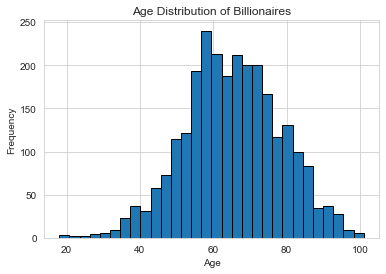

In [16]:
# Plot Age Distribution
eda.plot_age_distribution(data, "Age Distribution of Billionaires")


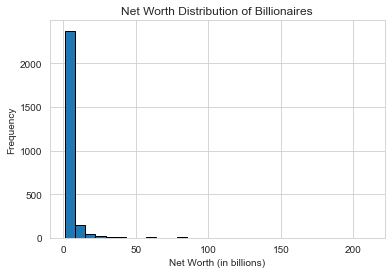

In [17]:
# Plot Net Worth Distribution
eda.plot_net_worth(data, "Net Worth Distribution of Billionaires")

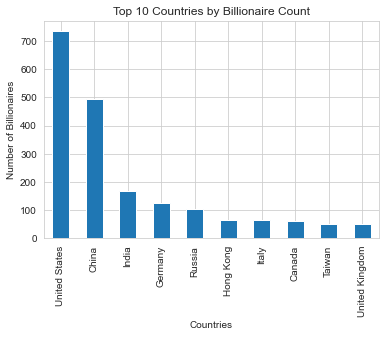

In [18]:
# Plot Top 10 Countries by Billionaire Count
eda.plot_top_10_bar(data, "Top 10 Countries by Billionaire Count", "Countries", "Number of Billionaires")




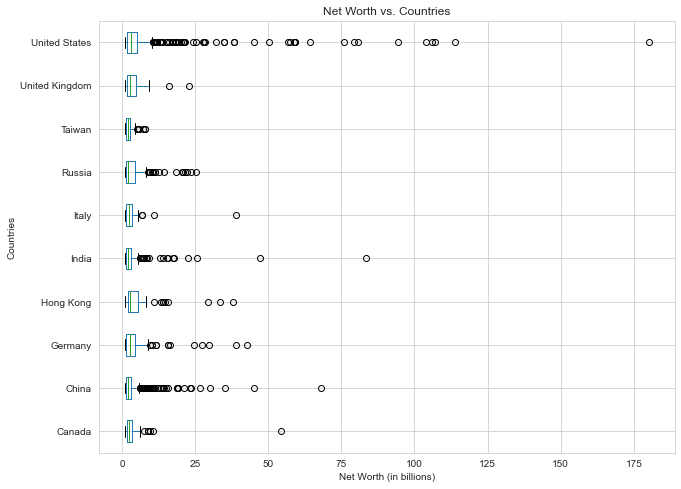

In [19]:
# Net Worth vs. Countries
eda.net_worth_vs_countries(data, "Net Worth vs. Countries", "Net Worth (in billions)", "Countries")

# Model 



In [20]:
# Example usage
# import pandas as pd
# data = pd.read_csv("dataset.csv")  # Load your data
target = 'net_worth'  # Example target variable
categorical_features = [ 'country','industry','Residence','Citizenship']  # Add actual categorical features
numerical_features = [ 'age', 'Philanthropy Score', 'Bachelor', 'Master', 'Doctorate', 'Drop Out']  # Add actual numerical features

# model = Model(data, target, categorical_features, numerical_features)
# result = model.build_model()
# Example usage:
# Assuming 'data' is your DataFrame, 'target_column' is your target variable,
# 'categorical_features' and 'numerical_features' are lists of your feature names.
model = Model(data, target, categorical_features, numerical_features)
model.build_and_evaluate_model(cv=5)


Cross-Validation Mean RMSE: 8.9799, Std Dev: 6.8068
MSE: 64.8565
R2 Score: 0.3291
MAE: 2.9352


'Cross-Validation Mean RMSE: 8.9799, Std Dev: 6.8068\nMSE: 64.8565\nR2 Score: 0.3291\nMAE: 2.9352'

## Predictive Analysis of Billionaires' Net Worth Using Linear Regression

## Introduction

In this project, we aim to unravel the complex factors influencing the net worth of billionaires, as listed in the Forbes Billionaire dataset. We adopt a statistical modeling approach, utilizing Linear Regression, to predict the net worth based on various attributes such as age, country, and industry.

## Methodology

### Data Preparation
- **Data Source**: Forbes Billionaire dataset.
- **Target Variable**: 'net_worth'.
- **Features**: A blend of categorical (e.g., country, industry) and numerical variables (e.g., age).

### Preprocessing Steps
- **Numerical Features**: Standardized to normalize the data distribution.
- **Categorical Features**: Encoded using OneHotEncoder to convert them into a machine-readable format.

### Model Pipeline
- Integrated preprocessing steps with a Linear Regression model in a single pipeline.
- Ensured streamlined processing and prevention of data leakage.

### Data Splitting
- Split the dataset into training and testing sets to evaluate the model's performance on unseen data.

## Cross-validation and Evaluation Metrics

### Cross-validation Strategy
- Implemented 5-fold cross-validation to assess model stability and reliability.
- Chose Root Mean Squared Error (RMSE) as the primary metric for its sensitivity to large errors.

### Key Performance Metrics
- **Mean RMSE (Cross-Validation)**: Evaluated the average error magnitude across different subsets of the data.
- **RMSE Standard Deviation**: Assessed the variability in model performance.
- **Mean Squared Error (MSE)**: Provided a measure of the average of the squares of the prediction errors.
- **R2 Score**: Offered insight into the proportion of variance in the net worth that is predictable from the features.
- **Mean Absolute Error (MAE)**: Captured the average magnitude of errors in a set of predictions.

## Detailed Analysis

The analysis using Linear Regression sheds light on the various factors contributing to the net worth of billionaires. However, given the moderate R2 score and RMSE, the model's predictive capability is deemed to be satisfactory but not optimal.

### Challenges Faced
- **Model Simplicity**: Linear Regression's simplicity may not fully capture the complex, nonlinear relationships inherent in the data.
- **Feature Selection and Engineering**: The effectiveness of the model is highly dependent on the choice and transformation of features.
- **Data Quality and Limitations**: Any inherent biases or errors in the dataset could limit the accuracy of the predictions.

### Opportunities for Improvement
- **Advanced Modeling Techniques**: Exploring more sophisticated models, such as polynomial regression or machine learning ensembles, could potentially improve accuracy.
- **Hyperparameter Optimization**: Fine-tuning the model's settings might lead to better performance.
- **Data Enrichment**: Augmenting the dataset with additional relevant features could enhance the model's explanatory power.

## Concluding Remarks

This project demonstrates the intricacies involved in modeling financial data and highlights the importance of continuous model refinement. The insights gained from this analysis form a foundational understanding of the factors affecting billionaires' net worth. Future iterations of this project will focus on employing more advanced analytical techniques to refine these insights further and potentially uncover new patterns and relationships in the data.
